In [9]:
from utils.logger import LogReader
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
lr = LogReader(reg='reg')

In [11]:
log_dir1 = '../Logs/script1'
data1 = lr.read_logs(log_dir1, text=False)  # 读取日志

df1 = pd.DataFrame(data1)
peter = {
    'RMSE': (df1.loc[df1['model'] == 'PETER']['RMSE'].max(), df1.loc[df1['model'] == 'PETER']['RMSE'].min()),
    'MAE':  (df1.loc[df1['model'] == 'PETER']['RMSE'].max(), df1.loc[df1['model'] == 'PETER']['RMSE'].min())
}

In [12]:
log_dir2 = '../Logs/script2'
data2 = lr.read_logs(log_dir2, text=False)

df2 = pd.DataFrame(data2)
df2 = df2[['model', 'emsize', 'RMSE', 'MAE']]
df2 = df2[df2['model'].isin(['PMF'])]

df2

,model,emsize,RMSE,MAE
0,PMF,16,0.7943,0.6028
1,PMF,32,0.7946,0.6034
2,PMF,64,0.7945,0.6037
3,PMF,128,0.7948,0.6042
4,PMF,256,0.7951,0.6052
5,PMF,512,0.7951,0.6059
6,PMF,768,0.7948,0.6055


In [13]:
log_dir3 = '../Logs/script3'
data3 = lr.read_logs(log_dir3, text=False)

df3 = pd.DataFrame(data3)
df3 = df3[['reg', 'model', 'emsize', 'RMSE', 'MAE']]
df3 = df3[df3['reg'].isin([0.0, 0.7, 0.8, 1.0])]
df3.loc[df3['reg'] == 0.0, 'model'] = 'SCoR+(0.0)'
df3.loc[df3['reg'] == 0.7, 'model'] = 'SCoR+(0.7)'
df3.loc[df3['reg'] == 0.8, 'model'] = 'SCoR+(0.8)'
df3.loc[df3['reg'] == 1.0, 'model'] = 'SCoR'

df3

,reg,model,emsize,RMSE,MAE
0,0.0,SCoR+(0.0),16,0.8367,0.6479
1,0.0,SCoR+(0.0),32,0.8308,0.6319
2,0.0,SCoR+(0.0),64,0.8231,0.6201
3,0.0,SCoR+(0.0),128,0.8228,0.6230
4,0.0,SCoR+(0.0),256,0.8143,0.6152
5,0.0,SCoR+(0.0),512,0.8071,0.6184
6,0.0,SCoR+(0.0),768,0.8074,0.6127
49,0.7,SCoR+(0.7),16,0.8255,0.6335
50,0.7,SCoR+(0.7),32,0.8183,0.6269
51,0.7,SCoR+(0.7),64,0.8143,0.6203


In [14]:
df = pd.concat([df2, df3], ignore_index=True)
df = df.loc[df['model'].isin(['PMF', 'SCoR+(0.0)', 'SCoR+(0.7)', 'SCoR+(0.8)'])]
df

,model,emsize,RMSE,MAE,reg
0,PMF,16,0.7943,0.6028,NaN
1,PMF,32,0.7946,0.6034,NaN
2,PMF,64,0.7945,0.6037,NaN
3,PMF,128,0.7948,0.6042,NaN
4,PMF,256,0.7951,0.6052,NaN
5,PMF,512,0.7951,0.6059,NaN
6,PMF,768,0.7948,0.6055,NaN
7,SCoR+(0.0),16,0.8367,0.6479,0.0
8,SCoR+(0.0),32,0.8308,0.6319,0.0
9,SCoR+(0.0),64,0.8231,0.6201,0.0


In [15]:
x = 'emsize'
y_list = ['RMSE', 'MAE']

paper = {
    'PETER': {'RMSE': 0.81, 'MAE': 0.63, 'color': 'm'},
    'SVD++': {'RMSE': 0.80, 'MAE': 0.61, 'color': 'b'},
    'NRT':   {'RMSE': 0.79, 'MAE': 0.61, 'color': 'r'},
    'NETE':  {'RMSE': 0.79, 'MAE': 0.60, 'color': 'g'},
}

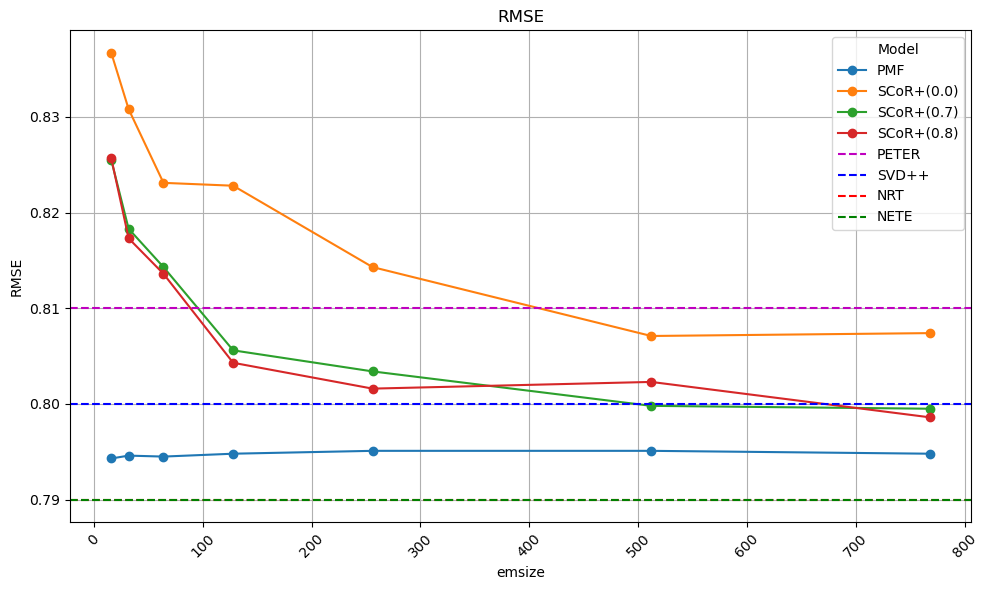

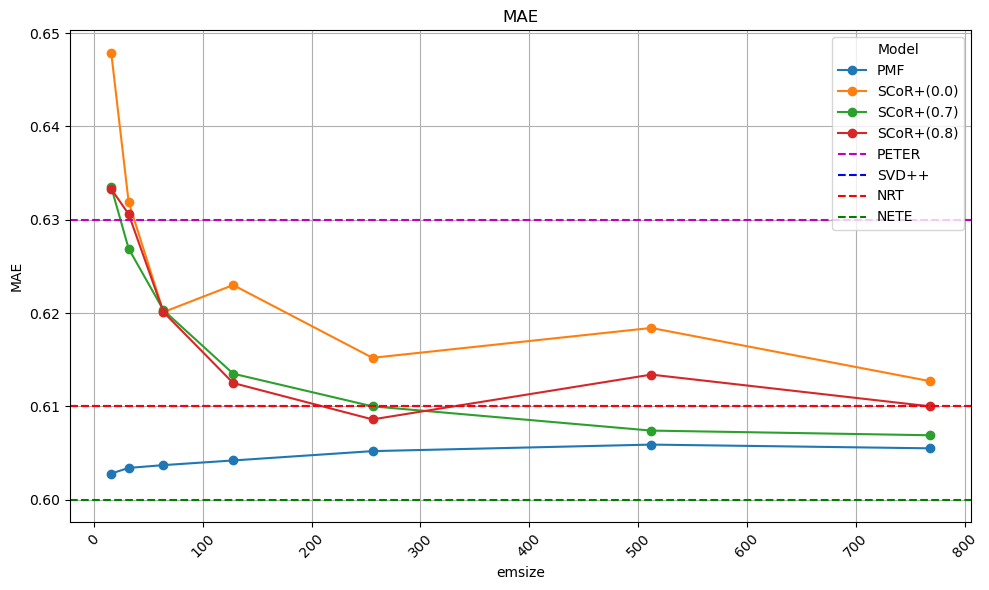

In [16]:
for y in y_list:
    # 使用 pivot 方法重塑数据，以标题作为列，时间戳作为索引
    df_pivot = df.pivot(index=x, columns='model', values=y)

    # 绘制折线图
    df_pivot.plot(kind='line', marker='o', figsize=(10, 6))
    for model, vals in paper.items():
        plt.axhline(y=vals[y], color=vals['color'], linestyle='--', label=model)

    # peter_max, peter_min = peter[y]
    # plt.axhspan(peter_min, peter_max, color='m', alpha=0.3)
    # plt.text(df.index[-1], (peter_max + peter_min) / 2, 'PETER', color='r', fontsize=12, ha='left', va='center')
    
    # 设置图形属性
    plt.title(y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend(title='Model')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 显示图形
    plt.show()